In [30]:
from matplotlib import pyplot
from scipy.optimize import curve_fit
import numpy

# For linear fit
def linear_objective(x, a, b):
 return a * x + b

# For log fit
def log_objective(x, a, b, c):
 return a * numpy.log(b*x)+c

# For exponential fit
def exponential_objective(x, a, b, c):
 return a * numpy.exp(b*x)+c

# For square fit
def square_objective(x, a, b):
 return a * numpy.power(x,2)+b

# For squareroot fit
def squareroot_objective(x, a, b):
 return a * numpy.power(x,1/2)+b

# Ahmdal's law
def Ahmdal_objective(x, a):
 return 1/(a + (1-a)/x)

# Gustafferson's law
def Gustafson_objective(x, a):
 return a + (1-a)*x


# Number of threads
x=[1,2,4,8,16,32]



y = 6.48342 * exp(-0.69345 x) + 0.29190


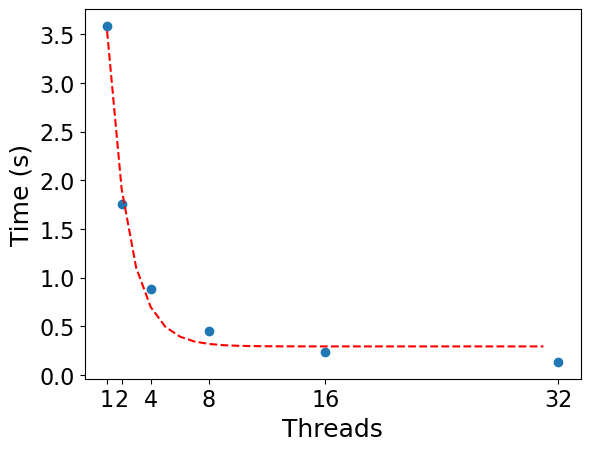

In [31]:
# Strong scaling. Vary the number of threads for a fixed problem size
y=[3.58595, 1.75585, 0.885481, 0.449167, 0.233239, 0.132404]

# plot input vs output
pyplot.scatter(x, y)

popt, _ = curve_fit(exponential_objective, x, y)
# summarize the parameter values
a, b, c = popt
print('y = %.5f * exp(%.5f x) + %.5f' % (a, b, c))
# define a sequence of inputs between the smallest and largest known inputs
x_line = numpy.arange(min(x), max(x), 1)
# calculate the output for the range
y_line = exponential_objective(x_line, a, b, c)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')


pyplot.xticks(x, size=16)
pyplot.yticks(size=16)
pyplot.xlabel("Threads", size=18)
pyplot.ylabel("Time (s)", size=18)

pyplot.show()

y = 1/(0.00558 + 0.99442/N)


/tmp/ipykernel_433597/81617218.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('y = 1/(%.5f + %.5f/N)' % (a, 1-a))


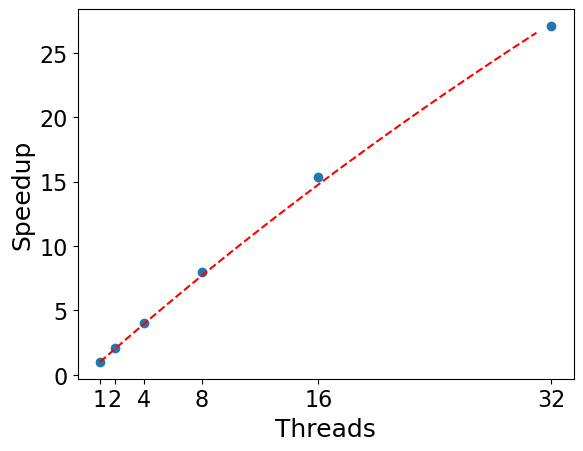

In [32]:
# Strong scaling. Vary the number of threads for a fixed problem size
y1 = 3.58595
y=list(map(lambda x: y1/x, y)) # divide y1, the time with one thread by each of the other times 

# plot input vs output
pyplot.scatter(x, y)

popt, _ = curve_fit(Ahmdal_objective, x, y)
## summarize the parameter values
a = popt
#speedup = 1 / (s + p / N)
print('y = 1/(%.5f + %.5f/N)' % (a, 1-a))
# define a sequence of inputs between the smallest and largest known inputs
x_line = numpy.arange(min(x), max(x), 1)
# calculate the output for the range
y_line = Ahmdal_objective(x_line, a)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')


pyplot.xticks(x, size=16)
pyplot.yticks(size=16)
pyplot.xlabel("Threads", size=18)
pyplot.ylabel("Speedup", size=18)

pyplot.show()

y = 0.01200 * x + 3.46234


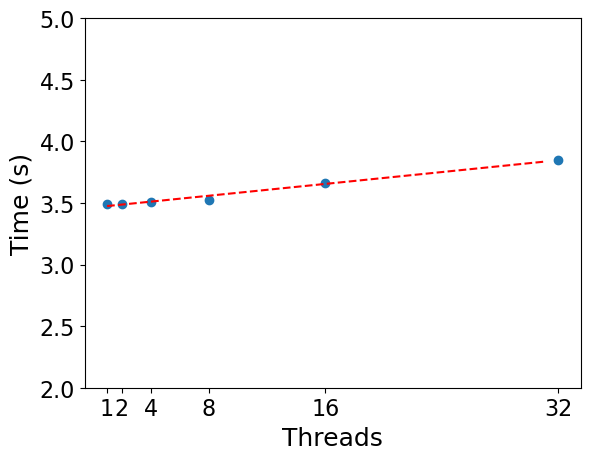

In [40]:
# Number of threads
x=[1,2,4,8,16,32]# Weak scaling. Vary the number of threads along with problem size

y=[3.49008, 3.49439, 3.50964, 3.52632, 3.65801, 3.85159]

# plot input vs output
pyplot.scatter(x, y)

popt, _ = curve_fit(linear_objective, x, y)
# summarize the parameter values
a, b = popt
print('y = %.5f * x + %.5f' % (a, b))
# define a sequence of inputs between the smallest and largest known inputs
x_line = numpy.arange(min(x), max(x), 1)
# calculate the output for the range
y_line = linear_objective(x_line, a, b)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')

# Set y limits to reasonable range
ax = pyplot.gca()
ax.set_ylim([2, 5])

pyplot.xticks(x, size=16)
pyplot.yticks(size=16)
pyplot.xlabel("Threads", size=18)
pyplot.ylabel("Time (s)", size=18)


pyplot.show()

y = 0.08415 + 0.91585*N


/tmp/ipykernel_433597/2912933300.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('y = %.5f + %.5f*N' % (a, 1-a))


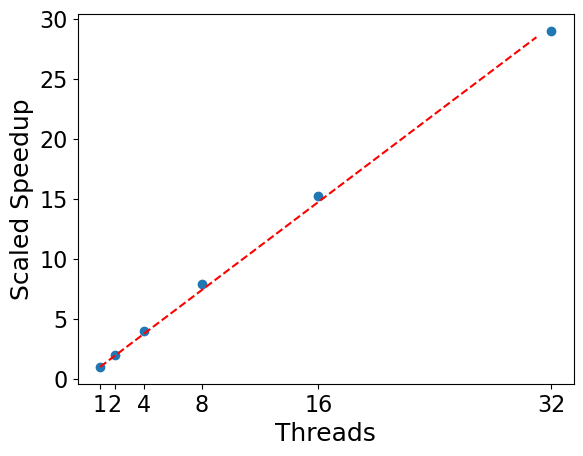

In [43]:
# Weak scaling. Vary the number of threads for a fixed problem size
#s=[10000, 20000, 40000, 80000, 160000, 32000]
x=[1,2,4,8,16,32]
y=[3.49008, 3.49439, 3.50964, 3.52632, 3.65801, 3.85159]
y1=3.49008
#y=list(map(lambda z: y1*z, y)) 
x=[1,2,4,8,16,32]

# Speedup scaled by the number of threads
y=[x[0]*y1/3.49008, x[1]*y1/3.49439, x[2]*y1/3.50964, x[3]*y1/3.52632, x[4]*y1/3.65801, x[5]*y1/3.85159]


# plot input vs output
pyplot.scatter(x, y)

popt, _ = curve_fit(Gustafson_objective, x, y)
# summarize the parameter values
a = popt
print('y = %.5f + %.5f*N' % (a, 1-a))
# define a sequence of inputs between the smallest and largest known inputs
x_line = numpy.arange(min(x), max(x), 1)
# calculate the output for the range
y_line = Gustafson_objective(x_line, a)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')

pyplot.xticks(x, size=16)
pyplot.yticks(size=16)
pyplot.xlabel("Threads", size=18)
pyplot.ylabel("Scaled Speedup", size=18)

pyplot.show()

# What if the code scaled as the square of the problem size?

# Strong Scaling

y = 2.43616 * exp(-0.66664 x) + 0.12087


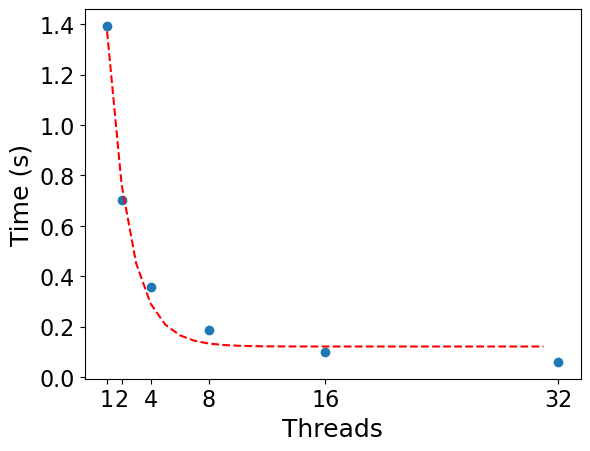

In [40]:

# Strong scaling. Vary the number of threads for a fixed problem size
y=[1.39307, 0.702423, 0.358414, 0.184742, 0.100895, 0.0597584]

# plot input vs output
pyplot.scatter(x, y)

popt, _ = curve_fit(exponential_objective, x, y)
# summarize the parameter values
a, b, c = popt
print('y = %.5f * exp(%.5f x) + %.5f' % (a, b, c))
# define a sequence of inputs between the smallest and largest known inputs
x_line = numpy.arange(min(x), max(x), 1)
# calculate the output for the range
y_line = exponential_objective(x_line, a, b, c)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')


pyplot.xticks(x, size=16)
pyplot.yticks(size=16)
pyplot.xlabel("Threads", size=18)
pyplot.ylabel("Time (s)", size=18)

pyplot.show()

## Speedup

y = 1/(0.01186 + 0.98814/N)


/tmp/ipykernel_431835/1519212516.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('y = 1/(%.5f + %.5f/N)' % (a, 1-a))


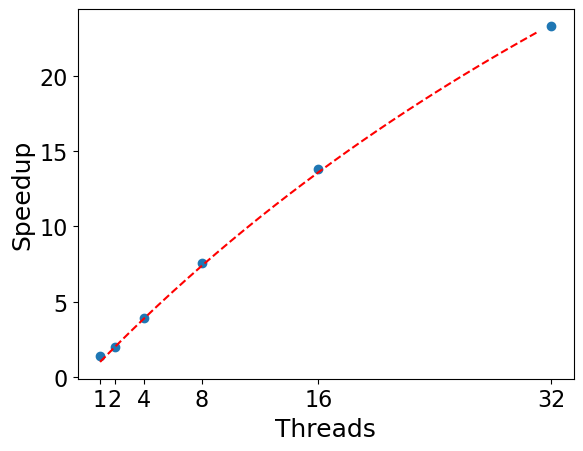

In [15]:
# Strong scaling. Vary the number of threads for a fixed problem size
y1 = 1.39307
y=[1.39307, y1/0.702423, y1/0.358414, y1/0.184742, y1/0.100895, y1/0.0597584]

# plot input vs output
pyplot.scatter(x, y)

popt, _ = curve_fit(Ahmdal_objective, x, y)
## summarize the parameter values
a = popt
#speedup = 1 / (s + p / N)
print('y = 1/(%.5f + %.5f/N)' % (a, 1-a))
# define a sequence of inputs between the smallest and largest known inputs
x_line = numpy.arange(min(x), max(x), 1)
# calculate the output for the range
y_line = Ahmdal_objective(x_line, a)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')


pyplot.xticks(x, size=16)
pyplot.yticks(size=16)
pyplot.xlabel("Threads", size=18)
pyplot.ylabel("Speedup", size=18)

pyplot.show()

# Weak Scaling

y = 0.00003 * x^2 + 0.01140


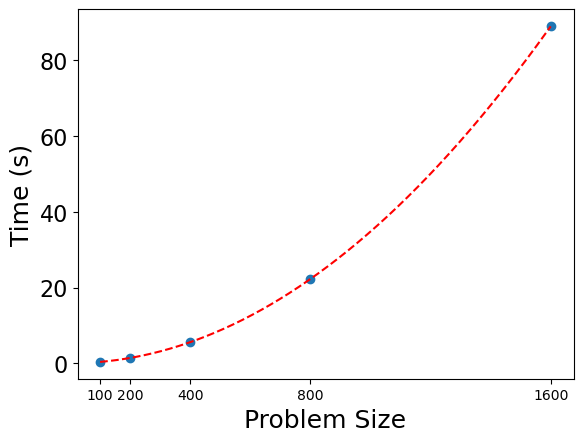

In [21]:
# Serial case runtime as a function of problem size x is the image height
x=[100, 200, 400, 800, 1600]
y=[0.355083, 1.38941, 5.60698, 22.2846, 89.1325]

# plot input vs output
pyplot.scatter(x, y)

popt, _ = curve_fit(square_objective, x, y)
# summarize the parameter values
a, b = popt
print('y = %.5f * x^2 + %.5f' % (a, b))
# define a sequence of inputs between the smallest and largest known inputs
x_line = numpy.arange(min(x), max(x), 1)
# calculate the output for the range
y_line = square_objective(x_line, a, b)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')

pyplot.xticks(x, size=10)
pyplot.yticks(size=16)
pyplot.xlabel("Problem Size", size=18)
pyplot.ylabel("Time (s)", size=18)


pyplot.show()


y = 0.35356 * x + -0.00787


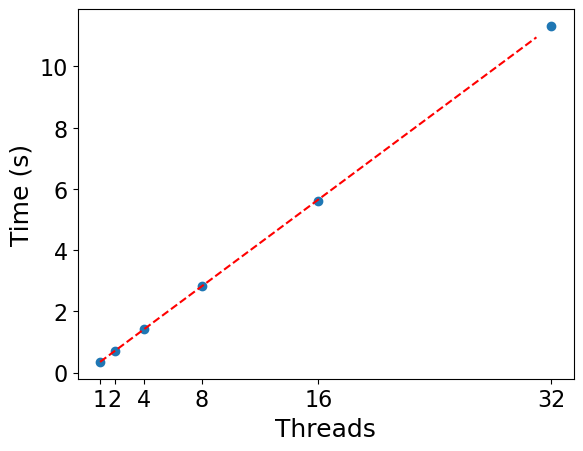

In [23]:
# Number of threads
x=[1,2,4,8,16,32]# Weak scaling. Vary the number of threads along with problem size

y=[0.355985, 0.702064, 1.41695, 2.81852, 5.60858, 11.3251]

# plot input vs output
pyplot.scatter(x, y)

popt, _ = curve_fit(linear_objective, x, y)
# summarize the parameter values
a, b = popt
print('y = %.5f * x + %.5f' % (a, b))
# define a sequence of inputs between the smallest and largest known inputs
x_line = numpy.arange(min(x), max(x), 1)
# calculate the output for the range
y_line = linear_objective(x_line, a, b)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')

pyplot.xticks(x, size=16)
pyplot.yticks(size=16)
pyplot.xlabel("Threads", size=18)
pyplot.ylabel("Time (s)", size=18)


pyplot.show()

y = 0.99958 + 0.00042*N


/tmp/ipykernel_433597/93748351.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('y = %.5f + %.5f*N' % (a, 1-a))


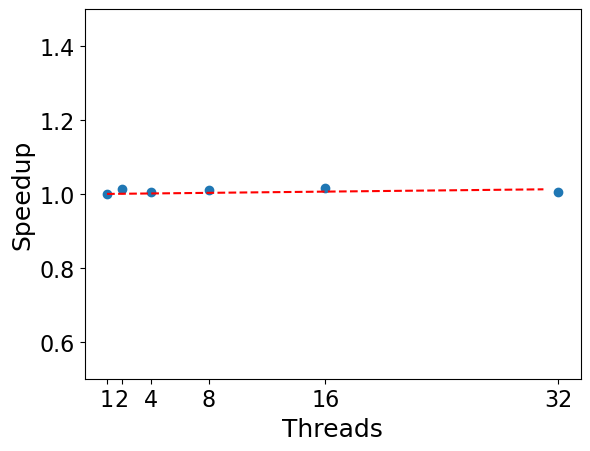

In [54]:
# Weak scaling. Vary the number of threads for a fixed problem size
x=[1,2,4,8,16,32]
y1 = 0.355985
# Speedup scaled by the number of threads
y=[x[0]*y1/0.355985, x[1]*y1/0.702064, x[2]*y1/1.41695, x[3]*y1/2.81852, x[4]*y1/5.60858, x[5]*y1/11.3251]

# plot input vs output
pyplot.scatter(x, y)

popt, _ = curve_fit(Gustafson_objective, x, y)
# summarize the parameter values
a = popt
print('y = %.5f + %.5f*N' % (a, 1-a))
# define a sequence of inputs between the smallest and largest known inputs
x_line = numpy.arange(min(x), max(x), 1)
# calculate the output for the range
y_line = Gustafson_objective(x_line, a)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')

# Set y limits to reasonable range
ax = pyplot.gca()
ax.set_ylim([0.5, 1.5])

pyplot.xticks(x, size=16)
pyplot.yticks(size=16)
pyplot.xlabel("Threads", size=18)
pyplot.ylabel("Speedup", size=18)

pyplot.show()

y = 0.99958 + 0.00042*N


/tmp/ipykernel_433597/93748351.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('y = %.5f + %.5f*N' % (a, 1-a))


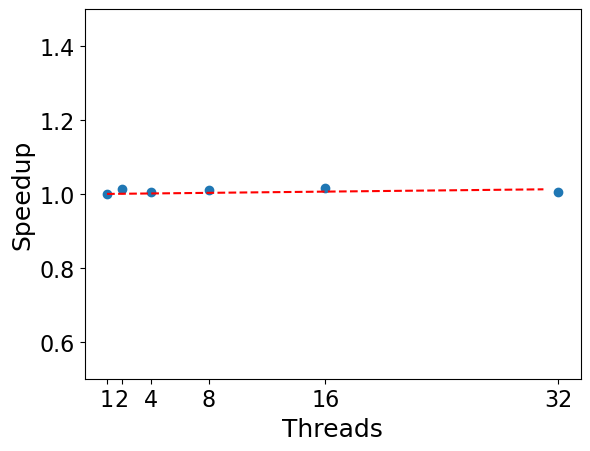

In [56]:
# Weak scaling. Vary the number of threads for a fixed problem size
x=[1,2,4,8,16,32]
y1 = 0.355985
# Speedup scaled by the number of threads
y=[x[0]*y1/0.355985, x[1]*y1/0.702064, x[2]*y1/1.41695, x[3]*y1/2.81852, x[4]*y1/5.60858, x[5]*y1/11.3251]

# plot input vs output
pyplot.scatter(x, y)

popt, _ = curve_fit(Gustafson_objective, x, y)
# summarize the parameter values
a = popt
print('y = %.5f + %.5f*N' % (a, 1-a))
# define a sequence of inputs between the smallest and largest known inputs
x_line = numpy.arange(min(x), max(x), 1)
# calculate the output for the range
y_line = Gustafson_objective(x_line, a)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')

# Set y limits to reasonable range
ax = pyplot.gca()
ax.set_ylim([0.5, 1.5])

pyplot.xticks(x, size=16)
pyplot.yticks(size=16)
pyplot.xlabel("Threads", size=18)
pyplot.ylabel("Speedup", size=18)

pyplot.show()